In [34]:
import numpy as np
import pandas as pd

In [35]:
# Importing necessary dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [36]:
# Getting the Dependent and Independent features
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [37]:
# Split the training and test data set
X_train,y_train,X_test,y_test = X[:60000],y[:60000],X[60000:],y[60000:]
some_digit = X[0]

In [38]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,y_train)

SVC()

In [39]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [40]:
# Verifying the score values for all 10 output labels
some_digit_score = svm_clf.decision_function([some_digit])                   
print(some_digit_score)

[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]


In [41]:
# Get the maximum score value
print (np.argmax(some_digit_score))

5


In [42]:
print(svm_clf.classes_)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [43]:
print(svm_clf.classes_[np.argmax(some_digit_score)])

5


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])
print(len(ovr_clf.estimators_))

In [44]:
# Verifying the scores with SGD classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])
print(sgd_clf.decision_function([some_digit]))


[[-18849.21976889 -28754.59989117 -10078.75490285    347.49318685
  -21028.59442041  -1153.57025725 -26474.97298692 -15403.36063122
  -12060.67745501 -11356.88447893]]


In [45]:
# getting the score value for SGD model
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train,y_train, cv=3, scoring="accuracy")

array([0.87775, 0.87385, 0.8716 ])

In [47]:
# Increasing the accuracy by scaling the Independent features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scale,y_train, cv=3, scoring="accuracy")

C:\Users\MYPC\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.89935, 0.8896 , 0.9078 ])

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

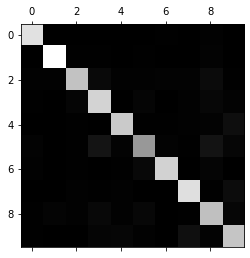

In [50]:
# Error Analysis
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict (sgd_clf, X_train,y_train, cv=3)
conf_mx = confusion_matrix (y_train, y_train_pred)


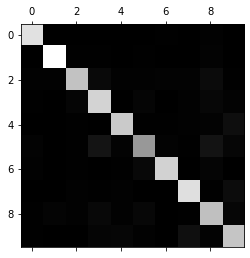

In [54]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.savefig("conf_mx")
plt.show()

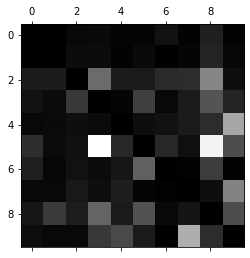

In [55]:
rows_sum = conf_mx.sum(axis=1, keepdims = True)
norm_conf_mx = conf_mx / rows_sum
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.savefig("norm_conf_mx")
plt.show()

<ipython-input-57-8132814fafc3>:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
<ipython-input-57-8132814fafc3>:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
<ipython-input-57-8132814fafc3>:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
<ipython-input-57-8132814fafc3>:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]


ZeroDivisionError: integer division or modulo by zero

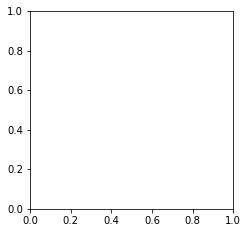

In [57]:

cl_a, cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222);plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223);plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224);plot_digits(X_bb[:25], images_per_row=5)
plt.savefig("pltdigits")
plt.show()